##Question : 9

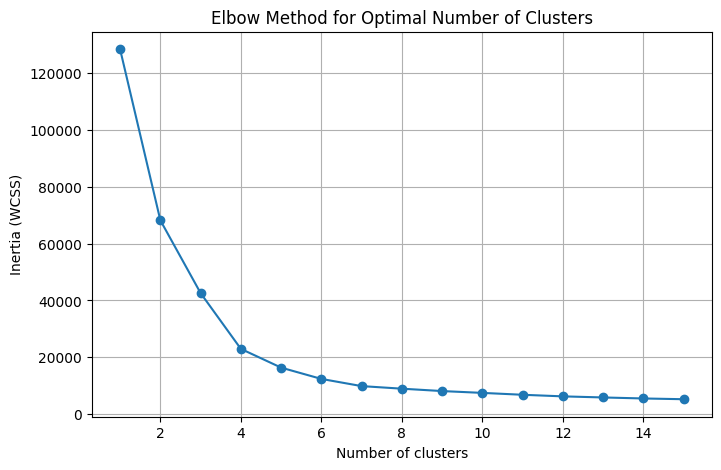

In [7]:
# K-means clustering

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# dataset
df_kmeans = pd.read_csv("A3_P1.csv")
X = df_kmeans.values

# Elbow method to find optimal number of clusters
inertias = []
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 16), inertias, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.show()

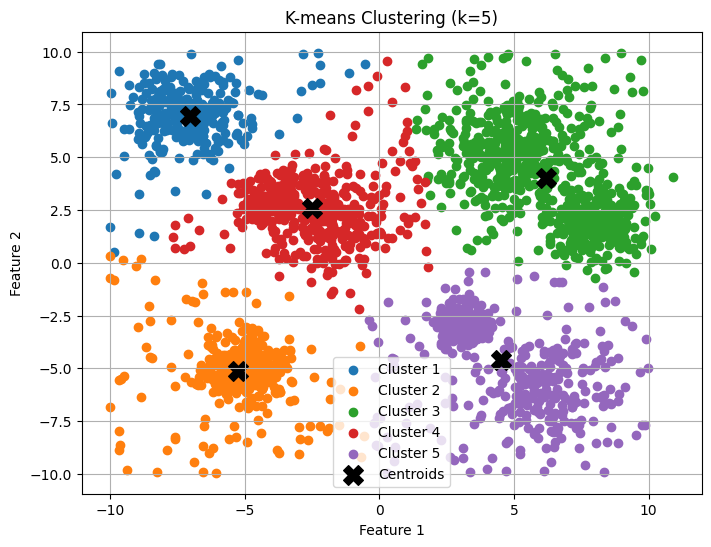

In [8]:
#  K-means clustering using the optimal number of clusters
optimal_k = 5 #example
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Plot clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')
plt.title(f'K-means Clustering (k={optimal_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

##Question: 10

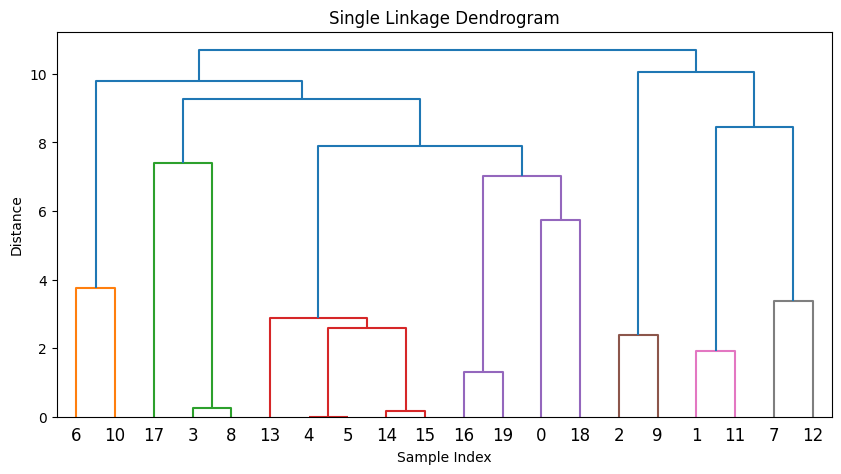

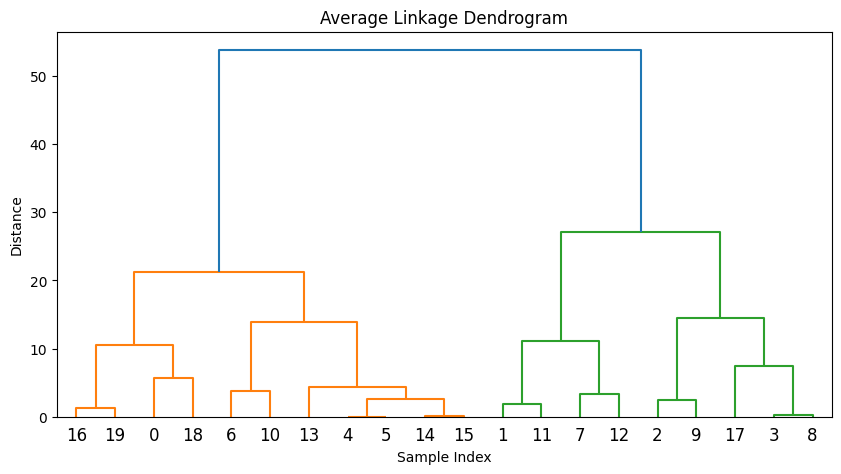

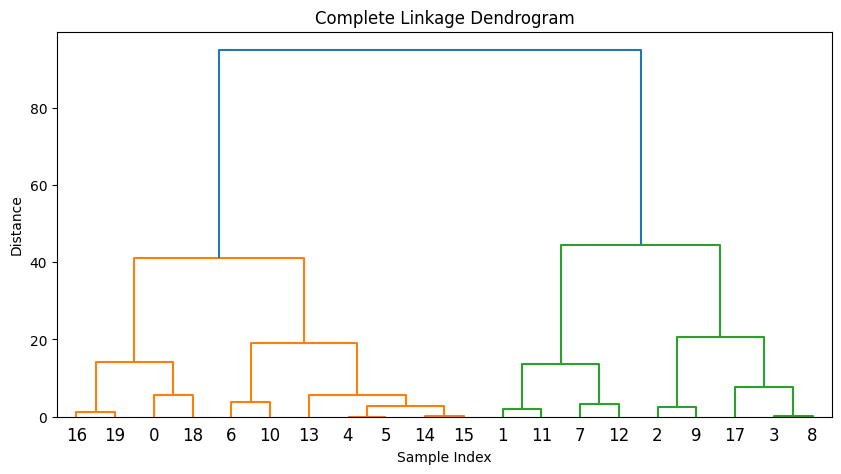

In [9]:
# Hierarchical Clustering

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# data
df = pd.read_csv("A3_P2.csv")
data = df.values

# Distance function (Euclidean)
def euclidean_dist(a, b):
    return np.linalg.norm(a - b)

# Cluster linkage function
def compute_linkage_distance(cluster1, cluster2, method):
    dists = [euclidean_dist(u, v) for u in cluster1 for v in cluster2]
    if method == 'single':
        return min(dists)
    elif method == 'average':
        return np.mean(dists)
    elif method == 'complete':
        return max(dists)

# Hierarchical clustering
def hierarchical_clustering(data, method='single'):
    clusters = [[x] for x in data]
    labels = list(range(len(data)))
    merge_log = []
    distances = []

    while len(clusters) > 1:
        min_dist = float('inf')
        best_pair = None
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = compute_linkage_distance(clusters[i], clusters[j], method)
                if dist < min_dist:
                    min_dist = dist
                    best_pair = (i, j)

        i, j = best_pair
        new_cluster = clusters[i] + clusters[j]
        merge_log.append([labels[i], labels[j], min_dist, len(new_cluster)])
        distances.append(min_dist)

        # Merge clusters and update labels
        clusters.append(new_cluster)
        labels.append(max(labels) + 1)
        for idx in sorted([i, j], reverse=True):
            del clusters[idx]
            del labels[idx]

    return np.array(merge_log)

# Generating and plot dendrograms
for method in ['single', 'average', 'complete']:
    linkage_matrix = hierarchical_clustering(data, method)
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, labels=[str(i) for i in range(len(data))])
    plt.title(f'{method.capitalize()} Linkage Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()